# **The Titanic**
**Exploring the Survival**





In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df_train = pd.read_csv("train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test = pd.read_csv("test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**Data Cleaning**

To see the information about the attributes and values in both datasets

In [ ]:
df_train.info()
print('-'*50)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

Combines both dataset in array 'both' so that performing data cleaning is as both dataset has same attributes and same type of data

In [ ]:
both = []

both.append(df_train)
both.append(df_test)

**Ticket Attribute**

Categroies the ticket and creates a new column Ticket type with ticket corresponding to one of these categories.

In [ ]:
for df in both:
  df['Ticket_type'] = df['Ticket'].apply(lambda x: x[0:3])
  df['Ticket_type'] = df['Ticket_type'].astype('category')
  df['Ticket_type'] = df['Ticket_type'].cat.codes
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,124
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,137
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,148
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,23
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,150
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


**Cabin Attribute**

Checks whether a person has a cabin or not and assigns 1 or 0 accordingly to corresponding passenger in new column

In [ ]:
for df in both:
  df['Has_Cabin'] = df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_type,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,124,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,137,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,148,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,23,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,150,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1


Dropping columns ticket and cabin as they are no longer needed

In [ ]:
df_train= df_train.drop(['Ticket','Cabin'], axis=1)
df_test= df_test.drop(['Ticket','Cabin'], axis=1)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_type,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,124,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,137,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,148,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,97,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,23,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,2,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,150,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,1


Checks if there are any null values for any attribute for a row

In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Ticket_type      0
Has_Cabin        0
dtype: int64

In [ ]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Ticket_type     0
Has_Cabin       0
dtype: int64

for training dataset, Age and Embarked attriute has some null values. Dropping all the rows with that has null values for any attribute

In [ ]:
df_train = df_train.dropna()

In [ ]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Ticket_type    0
Has_Cabin      0
dtype: int64

for test dataset, Age and fare attriute has some null values. Dropping all the rows with that has null values for any attribute

In [ ]:
df_test = df_test.dropna()

In [ ]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Ticket_type    0
Has_Cabin      0
dtype: int64

No null values left

**Sex Attribute**

Assigning 1 to males and 0 to female passengers

In [ ]:
df_train['Sex'] = df_train['Sex'].map( {'female': 0, 'male': 1} )
df_train['Sex'] = df_train['Sex'].astype(int)

df_test['Sex'] = df_test['Sex'].map( {'female': 0, 'male': 1} )
df_test['Sex'] = df_test['Sex'].astype(int)

In [ ]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_type,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,124,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,137,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,148,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,3,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,97,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,29.1250,Q,100,0
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,S,23,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,S,2,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,C,1,1


**Fare Attribute**

Categrozies fares

In [ ]:
df_train.loc[ df_train['Fare'] <= 7.91, 'Fare'] = 0
df_train.loc[(df_train['Fare'] > 7.91) & (df_train['Fare'] <= 14.454), 'Fare'] = 1
df_train.loc[(df_train['Fare'] > 14.454) & (df_train['Fare'] <= 31), 'Fare']   = 2
df_train.loc[ df_train['Fare'] > 31, 'Fare'] = 3
df_train['Fare'] = df_train['Fare'].astype(int)

df_test.loc[ df_test['Fare'] <= 7.91, 'Fare'] = 0
df_test.loc[(df_test['Fare'] > 7.91) & (df_test['Fare'] <= 14.454), 'Fare'] = 1
df_test.loc[(df_test['Fare'] > 14.454) & (df_test['Fare'] <= 31), 'Fare']   = 2
df_test.loc[ df_test['Fare'] > 31, 'Fare'] = 3
df_test['Fare'] = df_test['Fare'].astype(int)

In [ ]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_type,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,0,S,124,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,3,C,137,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,1,S,148,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,3,S,3,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,1,S,97,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,2,Q,100,0
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,1,S,23,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,2,S,2,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,2,C,1,1


**Name Attribute**

We see that there are certain titles in names of persons, let us extract those and see if they can be useful in machine learning.

In [ ]:
df_train['Title'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
df_train[['Title','Name']].groupby('Title').count()

,Name
Title,
Capt,1
Col,2
Countess,1
Don,1
Dr,6
Jonkheer,1
Lady,1
Major,2
Master,36


Now, we replace uncommon titles with rare and titles with same meaning to a common title.

In [ ]:
df_train['Title'] = df_train['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona','Countess', 'Lady', 'Sir'], 'Rare')

df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')
df_train['Title'] = df_train['Title'].replace('Ms', 'Miss')
df_train['Title'] = df_train['Title'].replace('Mme', 'Mrs')

df_test['Title'] = df_test['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona','Countess', 'Lady', 'Sir'], 'Rare')

df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')
df_test['Title'] = df_test['Title'].replace('Ms', 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')

In [ ]:
df_train[['Title','Name']].groupby('Title').count()

,Name
Title,
Master,36
Miss,148
Mr,398
Mrs,108
Rare,22


Looks better now!

Dropping the name since it would no longer be needed, also dropping passenger id in train dataset since it serves no purpose for our analysis.

In [ ]:
df_train = df_train.drop(['Name', 'PassengerId'], axis=1)
df_test = df_test.drop(['Name'], axis=1)

Now we map the title values to integers to categrize them, so they are usable in our machine learning model.

In [ ]:
map_matrix = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

df_train['Title'] = df_train['Title'].map(map_matrix)

df_test['Title'] = df_test['Title'].map(map_matrix)

In [ ]:
df_train[['Title','Sex']].groupby('Title').count()

,Sex
Title,
1,398
2,148
3,108
4,36
5,22


making sure that no values are null!

In [ ]:
df_train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Ticket_type    0
Has_Cabin      0
Title          0
dtype: int64

In [ ]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Ticket_type    0
Has_Cabin      0
Title          0
dtype: int64

**EDA Analysis**

In [ ]:
df_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_type,Has_Cabin,Title
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,0.636236,29.642093,0.514045,0.432584,1.595506,77.830056,0.257022,1.786517
std,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,1.087912,45.673987,0.437299,1.071003
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,1.000000,44.000000,0.000000,1.000000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,2.000000,81.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,3.000000,124.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,3.000000,153.000000,1.000000,5.000000


Only 40 percent of the people on board for train dataset survived the disaster. Most people did not had parch aboard. Only 25 percent of people had a cabin. Fare has great variations with some people paying very high amount like 512 dollars and other very low amount like 32 dollars.

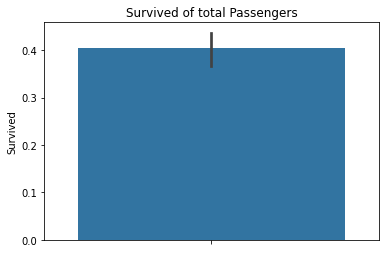

In [ ]:
plt.title("Survived of total Passengers")
sns.barplot(y='Survived',data=df_train)

Now we analyze string attributes of the dataset by following command.

In [ ]:
df_train.describe(include=['O'])

,Embarked
count,712
unique,3
top,S
freq,554


we learn that Embarked has 3 types with S being most frequent one. Also, names are mostly unique.

*Correlation HeatMap*

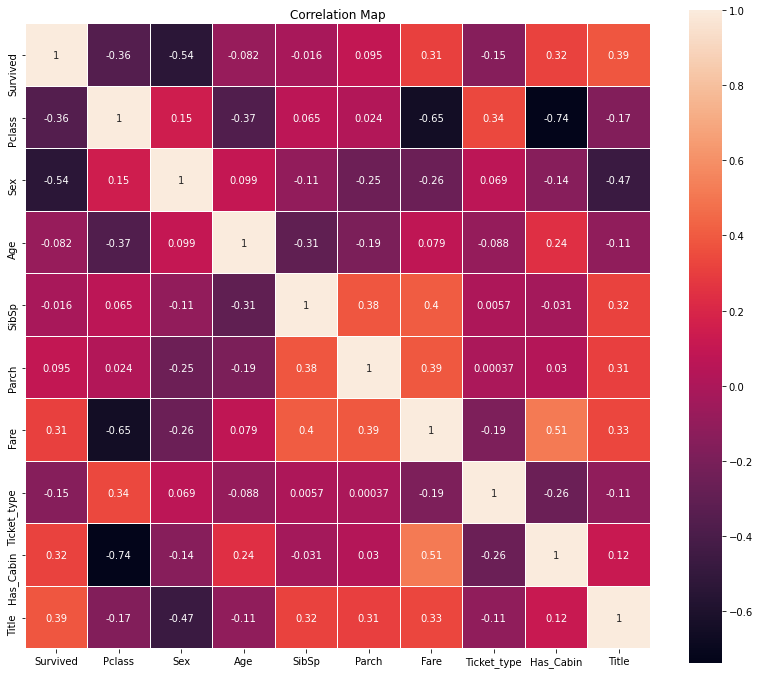

In [ ]:
plt.figure(figsize=(14,12))
plt.title('Correlation Map')
sns.heatmap(df_train.corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

Sex and survival has good correlation. also, pclass and survival corlates. Pclass, having cabin and fare has good correlation as these attributes are based on financial status of the person. Parch and sibSp has very low correlation with the survival. 

*Correlation between Pclass survival*

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.652174
1,2,0.479769
2,3,0.239437


Mapping Pclass to Age and Survival

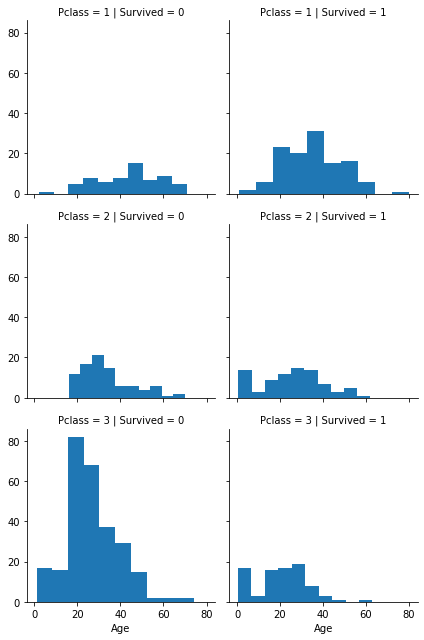

In [ ]:
g_class = sns.FacetGrid(df_train, col='Survived', row='Pclass')
g_class.map(plt.hist, 'Age')

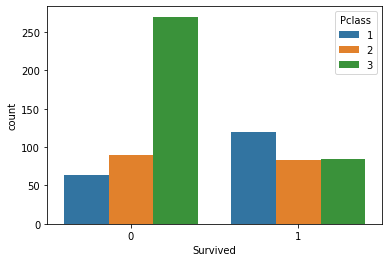

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=df_train)

We notice that despite having very high number of passenger than other classes, class 3 has very low survival rate. 65% of the passenger with Pclass 1 survived. While only 23% of passengers with Pclass 3 survived.

Following Graph shows age distribution within P classes

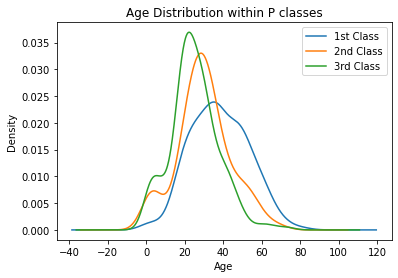

In [ ]:
df_train.Age[df_train['Pclass'] == 1].plot(kind='kde')    
df_train.Age[df_train['Pclass'] == 2].plot(kind='kde')
df_train.Age[df_train['Pclass'] == 3].plot(kind='kde')
plt.xlabel("Age")
plt.title("Age Distribution within P classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

*Sex and survival correlation*

In [ ]:
d = df_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
d

,Sex,Survived
0,0,0.752896
1,1,0.205298


75% of females survived while only 20 percent males survived.

Text(0.5, 1.0, 'Gender and survival')

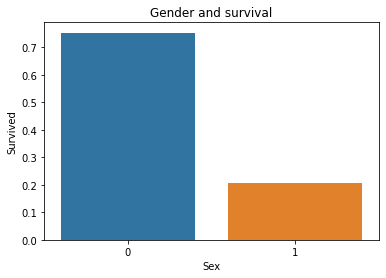

In [ ]:
sns.barplot(x='Sex',y='Survived',data=d)
plt.title("Gender and survival")

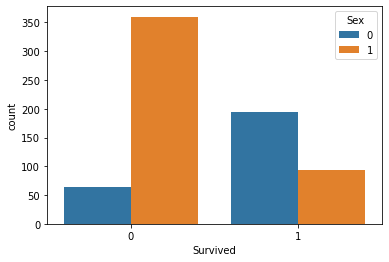

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=df_train)

Female has greater chance of survival than males.

*Age and Survival*

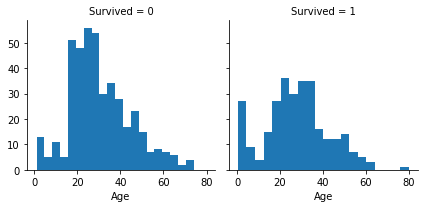

In [ ]:
h_age = sns.FacetGrid(df_train, col='Survived')
h_age.map(plt.hist, 'Age', bins=20)

Infants has very high rates of survival whereas 15 to 20 years old age has lowest survival rate. Most of the passengers are in range of 15 to 35. Oldest passenger was of age 80 and they survived. Mostly other old passengers did not survived.

*Fares variation and relation with survival*

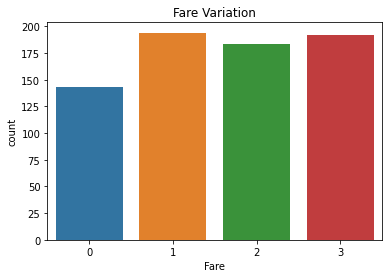

In [ ]:
plt.figure()
plt.title('Fare Variation')
sns.countplot(x='Fare',data=df_train)

Fare are pretty distributed and has high variations

*Parch and SibSp;* relation with Survival

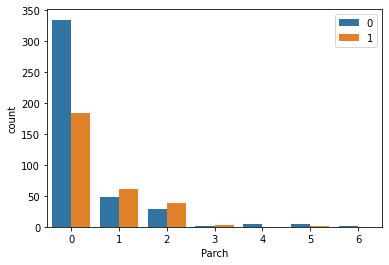

In [ ]:
sns.countplot(x='Parch',hue='Survived',data=df_train)
plt.legend(loc='upper right')

we can see a trend, let's analyze it for SibSp

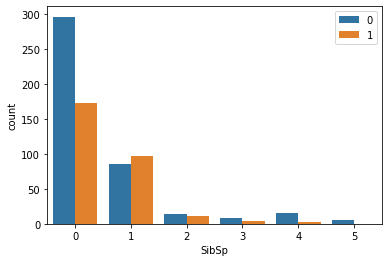

In [ ]:
sns.countplot(x='SibSp',hue='Survived',data=df_train)
plt.legend(loc='upper right')

we see that the number of Sibling, Spouse, children or parents aboard on ship does not effect of the survival much but rather if the person is traveling alone of not. If someone is traveling alone, they are more likely to not survive. We include this in our model by creating a new cloumn Alone that tells whether the person is aboard alone of not. If the person is traveling alone the value is one else it is 0.

In [ ]:
df_train['total'] = df_train['SibSp'] + df_train['Parch']
df_test['total'] = df_test['SibSp'] + df_train['Parch']

df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_type,Has_Cabin,Title,total
0,0,3,1,22.0,1,0,0,S,124,0,1,1
1,1,1,0,38.0,1,0,3,C,137,1,3,1
2,1,3,0,26.0,0,0,1,S,148,0,2,0
3,1,1,0,35.0,1,0,3,S,3,1,3,1
4,0,3,1,35.0,0,0,1,S,97,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,2,Q,100,0,3,5
886,0,2,1,27.0,0,0,1,S,23,0,5,0
887,1,1,0,19.0,0,0,2,S,2,1,2,0
889,1,1,1,26.0,0,0,2,C,1,1,1,0


In [ ]:
df_train['Alone'] =df_train['total'].apply(lambda x: 0 if x>0 else 1)
df_test['Alone'] =df_test['total'].apply(lambda x: 0 if x>0 else 1)

In [ ]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_type,Has_Cabin,Title,total,Alone
0,0,3,1,22.0,1,0,0,S,124,0,1,1,0
1,1,1,0,38.0,1,0,3,C,137,1,3,1,0
2,1,3,0,26.0,0,0,1,S,148,0,2,0,1
3,1,1,0,35.0,1,0,3,S,3,1,3,1,0
4,0,3,1,35.0,0,0,1,S,97,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,2,Q,100,0,3,5,0
886,0,2,1,27.0,0,0,1,S,23,0,5,0,1
887,1,1,0,19.0,0,0,2,S,2,1,2,0,1
889,1,1,1,26.0,0,0,2,C,1,1,1,0,1


looks great!

Now, we no longer need Parch, SibSp and total attributes, so we will drop those.

In [ ]:
df_train = df_train.drop(['Parch','SibSp','total'], axis=1)
df_test = df_test.drop(['Parch','SibSp','total'], axis=1)

df_train

,Survived,Pclass,Sex,Age,Fare,Embarked,Ticket_type,Has_Cabin,Title,Alone
0,0,3,1,22.0,0,S,124,0,1,0
1,1,1,0,38.0,3,C,137,1,3,0
2,1,3,0,26.0,1,S,148,0,2,1
3,1,1,0,35.0,3,S,3,1,3,0
4,0,3,1,35.0,1,S,97,0,1,1
...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,2,Q,100,0,3,0
886,0,2,1,27.0,1,S,23,0,5,1
887,1,1,0,19.0,2,S,2,1,2,1
889,1,1,1,26.0,2,C,1,1,1,1


*Age dist with Gender*

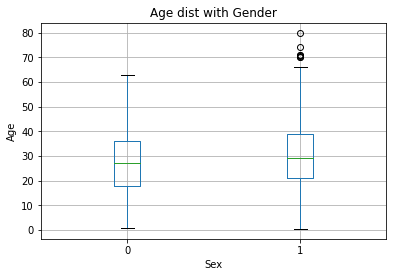

In [ ]:
df_train.boxplot(by='Sex', column=['Age'],grid=True)
plt.title('Age dist with Gender')
plt.suptitle('')
plt.ylabel('Age')
plt.xlabel('Sex')
plt.show()

From distribution plot, we can see that 50% of the females passengers lies between somewhat 18 to 37 and 50% of the male passengers are between somewhat 21 to 39. The old popultion is higher in male than in females.

In [ ]:
df_train['Age'] = df_train['Age'].astype(int)
df_test['Age'] = df_test['Age'].astype(int)

*Survival And Embarked Relation*

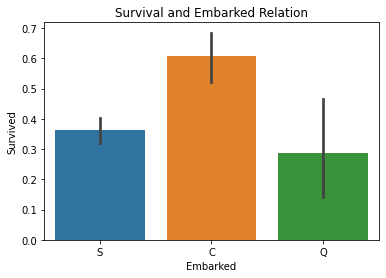

In [ ]:
plt.figure()
plt.title('Survival and Embarked Relation')
sns.barplot(data = df_train,x ='Embarked', y = 'Survived')

Passengers embarking from C has highest survival rate.

This can be used in our machine learning models.
So we map these values to integers.

In [ ]:
to_map = {"S": 1, "C": 2, "Q": 3}

df_train['Embarked'] = df_train['Embarked'].map(to_map)
df_test['Embarked'] = df_test['Embarked'].map(to_map)

df_train

,Survived,Pclass,Sex,Age,Fare,Embarked,Ticket_type,Has_Cabin,Title,Alone
0,0,3,1,22,0,1,124,0,1,0
1,1,1,0,38,3,2,137,1,3,0
2,1,3,0,26,1,1,148,0,2,1
3,1,1,0,35,3,1,3,1,3,0
4,0,3,1,35,1,1,97,0,1,1
...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39,2,3,100,0,3,0
886,0,2,1,27,1,1,23,0,5,1
887,1,1,0,19,2,1,2,1,2,1
889,1,1,1,26,2,2,1,1,1,1


Has Cabin and Survival

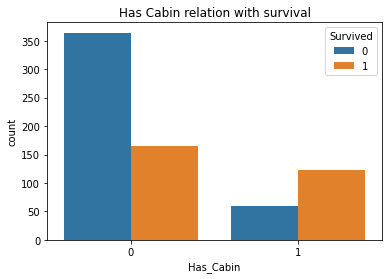

In [ ]:
plt.figure()
plt.title('Has Cabin relation with survival')
sns.countplot(x='Has_Cabin',hue='Survived',data=df_train)

People with cabin has higher survival rate than people who did not had cabin. Also, very low number of people has cabin.

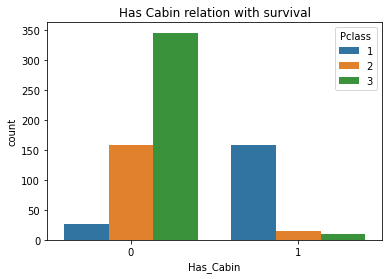

In [ ]:
plt.figure()
plt.title('Has Cabin relation with survival')
sns.countplot(x='Has_Cabin',hue='Pclass',data=df_train)

class 1 has most passenger that has a cabin, this makes sense since class 1 has financially stabled individuals. 

**Machine Learning**
Working with the models

checking data shapes

In [ ]:
print(df_train.shape)
print(df_test.shape)
df_test

(712, 10)
(331, 10)


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Ticket_type,Has_Cabin,Title,Alone
0,892,3,1,34,0,3,58,0,1,1
1,893,3,0,47,0,1,71,0,3,0
2,894,2,1,62,1,3,32,0,1,1
3,895,3,1,27,1,1,55,0,1,1
4,896,3,0,22,1,1,54,0,3,0
...,...,...,...,...,...,...,...,...,...,...
409,1301,3,0,3,1,1,113,0,2,1
411,1303,1,0,37,3,3,18,1,3,1
412,1304,3,0,28,0,1,66,0,2,1
414,1306,1,0,39,3,2,107,1,5,1


preparing data to use in machine learning models

In [ ]:
trainX = df_train.drop("Survived", axis=1)
trainY = df_train["Survived"]
testX = df_test.drop("PassengerId", axis=1)

In [ ]:
print(trainX.shape,trainY.shape,testX.shape)

(712, 9) (712,) (331, 9)


Now , our data is ready for machine learning models. We are performing the type of machine learning called "Supervised Machine learning". We want to identify relation between the survival and other features. The other entites effect the output that can only be either Survived or not survived(binary). There are many machine learning algorithms available to choose from. But from the above information, we can see that the problem is a regression and classifying problem. Based on this, we can narrow down our machine learning algorithm list. We choose a few machine learning algorithm to evaluate for our data and pick the one that best fits our model. Based on the above information, we decided to use the following machine learning algorithms.

* Logistic Regression
* Random Forest
* Support Vector Machines
* Gradient Boosting Classifier
* k-Nearest Neighbors (KNN)

We will train our data using this model and then check the accuracy to be able evaluate these models.


In [ ]:
evaluation = {}

*Logistic Regression Model*

In [ ]:
logi_reg = LogisticRegression()
logi_reg.fit(trainX, trainY)
acc_logi_reg = round(logi_reg.score(trainX, trainY) * 100, 2)
evaluation['Logistic Regression'] = acc_logi_reg

In [ ]:
acc_logi_reg

80.62

*Random Forest Model*

In [ ]:
rand_frst = RandomForestClassifier(n_estimators=100)
rand_frst.fit(trainX, trainY)
rand_frst.score(trainX, trainY)
acc_rand_frst = round(rand_frst.score(trainX, trainY) * 100, 2)
evaluation['Random Forest'] = acc_rand_frst
acc_rand_frst

99.44

*Support Vector Machines Model*

In [ ]:
supp_vect = SVC()
supp_vect.fit(trainX, trainY)
acc_supp_vect = round(supp_vect.score(trainX, trainY) * 100, 2)
evaluation['Support Vector Machines']= acc_supp_vect
acc_supp_vect

66.85

*Gradient Boosting Classifier Model*

In [ ]:
grad_boost = GradientBoostingClassifier()
grad_boost.fit(trainX, trainY)
acc_grad_boost = round(grad_boost.score(trainX, trainY) * 100, 2)
evaluation['Gradient Boosting'] = acc_grad_boost
acc_grad_boost

89.89

*k-Nearest Neighbors Model*

In [ ]:
k_near = KNeighborsClassifier(n_neighbors = 3)
k_near.fit(trainX, trainY)
acc_k_near = round(k_near.score(trainX, trainY) * 100, 2)
evaluation['k-Nearest Neighbors'] = acc_k_near
acc_k_near

82.87

Now we have trained all the models lets compare their outputs.

In [ ]:
sorted_evaluation = sorted(evaluation.items(), key=lambda x: x[1], reverse=True)
for i in sorted_evaluation:
  print(i[0]," ",i[1])

Random Forest   99.44
Gradient Boosting   89.89
k-Nearest Neighbors   82.87
Logistic Regression   80.62
Support Vector Machines   66.85


([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

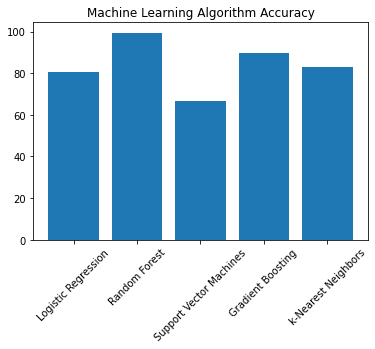

In [ ]:
plt.figure()
plt.title('Machine Learning Algorithm Accuracy')
keys = evaluation.keys()
values = evaluation.values()

plt.bar(keys, values)
plt.xticks(rotation=45)

We see that random forest generates the highest accuracy for our dataset. So we choose random forest for predicting test values.

In [ ]:
predicted = rand_frst.predict(testX)
pred_sur=pd.DataFrame(predicted,columns=['Survival'],index=testX.index)
pred_sur

,Survival
0,0
1,0
2,0
3,1
4,1
...,...
409,1
411,1
412,1
414,1


The model gives us the predicted values for our test data. now we add these values in test data to be able to analyze the results.

In [ ]:
testX['pred_survived'] = pred_sur['Survival']
testX

,Pclass,Sex,Age,Fare,Embarked,Ticket_type,Has_Cabin,Title,Alone,pred_survived
0,3,1,34,0,3,58,0,1,1,0
1,3,0,47,0,1,71,0,3,0,0
2,2,1,62,1,3,32,0,1,1,0
3,3,1,27,1,1,55,0,1,1,1
4,3,0,22,1,1,54,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...
409,3,0,3,1,1,113,0,2,1,1
411,1,0,37,3,3,18,1,3,1,1
412,3,0,28,0,1,66,0,2,1,1
414,1,0,39,3,2,107,1,5,1,1


In [ ]:
testX[['pred_survived','Age']].groupby('pred_survived').count()

,Age
pred_survived,
0,191
1,140


So by the models prediction, 190 out of 331 passengers in test dataset would not sevice and only 141 will survive. Which make the survival rate almost 42%.

Now we compare this with the actual number of survival.

In [ ]:
actual = pd.read_csv('gender_submission.csv')
actual

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


we need to consider only those 331 values for whom we predicted the model.

In [ ]:
df_final = pd.concat([actual,testX],axis=1)
df_final

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Ticket_type,Has_Cabin,Title,Alone,pred_survived
0,892,0,3.0,1.0,34.0,0.0,3.0,58.0,0.0,1.0,1.0,0.0
1,893,1,3.0,0.0,47.0,0.0,1.0,71.0,0.0,3.0,0.0,0.0
2,894,0,2.0,1.0,62.0,1.0,3.0,32.0,0.0,1.0,1.0,0.0
3,895,0,3.0,1.0,27.0,1.0,1.0,55.0,0.0,1.0,1.0,1.0
4,896,1,3.0,0.0,22.0,1.0,1.0,54.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,1306,1,1.0,0.0,39.0,3.0,2.0,107.0,1.0,5.0,1.0,1.0
415,1307,0,3.0,1.0,38.0,0.0,1.0,113.0,0.0,1.0,1.0,0.0
416,1308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


now we need to cater the null values.

In [ ]:
df_final = df_final.dropna()
df_final

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Ticket_type,Has_Cabin,Title,Alone,pred_survived
0,892,0,3.0,1.0,34.0,0.0,3.0,58.0,0.0,1.0,1.0,0.0
1,893,1,3.0,0.0,47.0,0.0,1.0,71.0,0.0,3.0,0.0,0.0
2,894,0,2.0,1.0,62.0,1.0,3.0,32.0,0.0,1.0,1.0,0.0
3,895,0,3.0,1.0,27.0,1.0,1.0,55.0,0.0,1.0,1.0,1.0
4,896,1,3.0,0.0,22.0,1.0,1.0,54.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3.0,0.0,3.0,1.0,1.0,113.0,0.0,2.0,1.0,1.0
411,1303,1,1.0,0.0,37.0,3.0,3.0,18.0,1.0,3.0,1.0,1.0
412,1304,1,3.0,0.0,28.0,0.0,1.0,66.0,0.0,2.0,1.0,1.0
414,1306,1,1.0,0.0,39.0,3.0,2.0,107.0,1.0,5.0,1.0,1.0


In [ ]:
df_final.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
Fare             0
Embarked         0
Ticket_type      0
Has_Cabin        0
Title            0
Alone            0
pred_survived    0
dtype: int64

selecting passenger id, survied and predicted survived attributes

In [ ]:
dataset = df_final[['PassengerId','Survived','pred_survived']]
dataset['pred_survived']=dataset['pred_survived'].astype(int)

In [ ]:
dataset.tail()

,PassengerId,Survived,pred_survived
409,1301,1,1
411,1303,1,1
412,1304,1,1
414,1306,1,1
415,1307,0,0


In [ ]:
dataset['equal'] = np.where(dataset['Survived'] == dataset['pred_survived'], True, False)

In [ ]:
dataset

,PassengerId,Survived,pred_survived,equal
0,892,0,0,True
1,893,1,0,False
2,894,0,0,True
3,895,0,1,False
4,896,1,1,True
...,...,...,...,...
409,1301,1,1,True
411,1303,1,1,True
412,1304,1,1,True
414,1306,1,1,True


In [ ]:
temp = dataset[['pred_survived','equal']].groupby('equal').count()
temp

,pred_survived
equal,
False,47
True,284


We model was able to successfully predict 283 out of 331 values of test dataset.

In [ ]:
per = temp['pred_survived'][1]/(temp['pred_survived'][1]+temp['pred_survived'][0])
accuracy = per*100
accuracy

85.80060422960725

The accuracy of our model is 85.5 percent which is far better than 50 50 percent situation for such binary problem (probability of 0 or 1) or 58% situation if we predict that all of the passengers would not servive ( 58% of all passgengers do not survive, so if we guess that all passengers would not survive we will be right 58% times).